# 🚀 Transformers ile Doğal Dil İşleme: From Zero to Hero

**Eğitmen:** NLP Bootcamp - Kairu  
**Seviye:** Başlangıçtan İleri Seviyeye  
**Hedef:** Transformers kütüphanesini kullanarak gerçek dünya problemlerini çözme

---

## 📋 İçindekiler

1. **Kurulum ve Hazırlık**
2. **Duygu Analizi (Sentiment Analysis)**
3. **Sıfır-Atış Sınıflandırma (Zero-Shot Classification)**
4. **Metin Üretimi (Text Generation)**
5. **Maskeli Kelime Tahmini (Fill-Mask)**
6. **Adlandırılmış Varlık Tanıma (NER)**
7. **Soru-Cevap Sistemleri (Q&A)**
8. **Metin Özetleme (Summarization)**
9. **Makine Çevirisi (Translation)**
10. **Gerçek Veri Seti Uygulaması**

---

## 🎯 Bu Notebook'ta Neler Öğreneceğiz?

- ✅ Hugging Face Transformers kütüphanesini kullanmayı
- ✅ Farklı NLP görevleri için hazır modelleri kullanmayı
- ✅ Pipeline API ile hızlı prototipleme yapmayı
- ✅ Gerçek veri setleri üzerinde uygulama geliştirmeyi
- ✅ Model seçimi ve optimizasyonu yapmayı

---

## 📦 Gerekli Kütüphanelerin Kurulumu

Hugging Face ekosistemini kurmak için aşağıdaki paketleri yüklüyoruz:

In [1]:
# datasets: Veri setlerini yüklemek ve işlemek için
# evaluate: Model performansını değerlendirmek için
# transformers: Pre-trained modelleri kullanmak için
# sentencepiece: Bazı modellerin tokenizer'ı için gerekli

!pip install datasets evaluate transformers[sentencepiece] -q

# Ek kütüphaneler
!pip install pandas numpy matplotlib seaborn -q

print("✅ Tüm kütüphaneler başarıyla yüklendi!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.1 MB/s eta 0:00:00
✅ Tüm kütüphaneler başarıyla yüklendi!


In [2]:
# Gerekli kütüphaneleri import edelim
import warnings
warnings.filterwarnings('ignore')  # Gereksiz uyarıları gizle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Görselleştirme ayarları
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("📚 Kütüphaneler yüklendi ve hazır!")

📚 Kütüphaneler yüklendi ve hazır!


---

# 1️⃣ Duygu Analizi (Sentiment Analysis)

Duygu analizi, bir metnin duygusal tonunu (pozitif, negatif, nötr) belirleme işlemidir.

## 🎯 Kullanım Alanları:

- **Müşteri Geri Bildirimleri:** Ürün yorumlarını analiz etme
- **Sosyal Medya Takibi:** Marka algısını ölçme
- **Pazar Araştırması:** Tüketici duygularını anlama
- **Kriz Yönetimi:** Olumsuz tepkileri erken tespit etme

## 🔧 Pipeline Yaklaşımı

Hugging Face'in `pipeline` API'si, karmaşık NLP görevlerini tek satırda yapmanıza olanak tanır.

In [3]:
from transformers import pipeline

# Pipeline oluştur
# Varsayılan olarak 'distilbert-base-uncased-finetuned-sst-2-english' modelini kullanır
# Bu model, Stanford Sentiment Treebank (SST-2) veri seti üzerinde eğitilmiştir
classifier = pipeline("sentiment-analysis")

print("✅ Duygu analizi modeli yüklendi!")
print(f"📊 Kullanılan model: {classifier.model.name_or_path}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Duygu analizi modeli yüklendi!
📊 Kullanılan model: distilbert/distilbert-base-uncased-finetuned-sst-2-english


In [4]:
# Örnek metinler üzerinde duygu analizi yapalım
test_metinler = [
    "I've been waiting for a HuggingFace course my whole life.",  # Pozitif
    "I hate this so much!",  # Negatif
    "This product is absolutely amazing! Best purchase ever!",  # Pozitif
    "Terrible experience, would not recommend.",  # Negatif
    "It's okay, nothing special."  # Nötr (ama model pozitif/negatif seçecek)
]

# Analizleri çalıştır
sonuclar = classifier(test_metinler)

# Sonuçları görselleştirelim
print("🎭 DUYGU ANALİZİ SONUÇLARI\n" + "="*60)
for i, (metin, sonuc) in enumerate(zip(test_metinler, sonuclar), 1):
    emoji = "😊" if sonuc['label'] == 'POSITIVE' else "😞"
    print(f"\n{i}. Metin: {metin}")
    print(f"   {emoji} Duygu: {sonuc['label']}")
    print(f"   📊 Güven Skoru: {sonuc['score']:.4f} ({sonuc['score']*100:.2f}%)")

🎭 DUYGU ANALİZİ SONUÇLARI

1. Metin: I've been waiting for a HuggingFace course my whole life.
   😊 Duygu: POSITIVE
   📊 Güven Skoru: 0.9598 (95.98%)

2. Metin: I hate this so much!
   😞 Duygu: NEGATIVE
   📊 Güven Skoru: 0.9995 (99.95%)

3. Metin: This product is absolutely amazing! Best purchase ever!
   😊 Duygu: POSITIVE
   📊 Güven Skoru: 0.9999 (99.99%)

4. Metin: Terrible experience, would not recommend.
   😞 Duygu: NEGATIVE
   📊 Güven Skoru: 0.9934 (99.34%)

5. Metin: It's okay, nothing special.
   😞 Duygu: NEGATIVE
   📊 Güven Skoru: 0.8190 (81.90%)


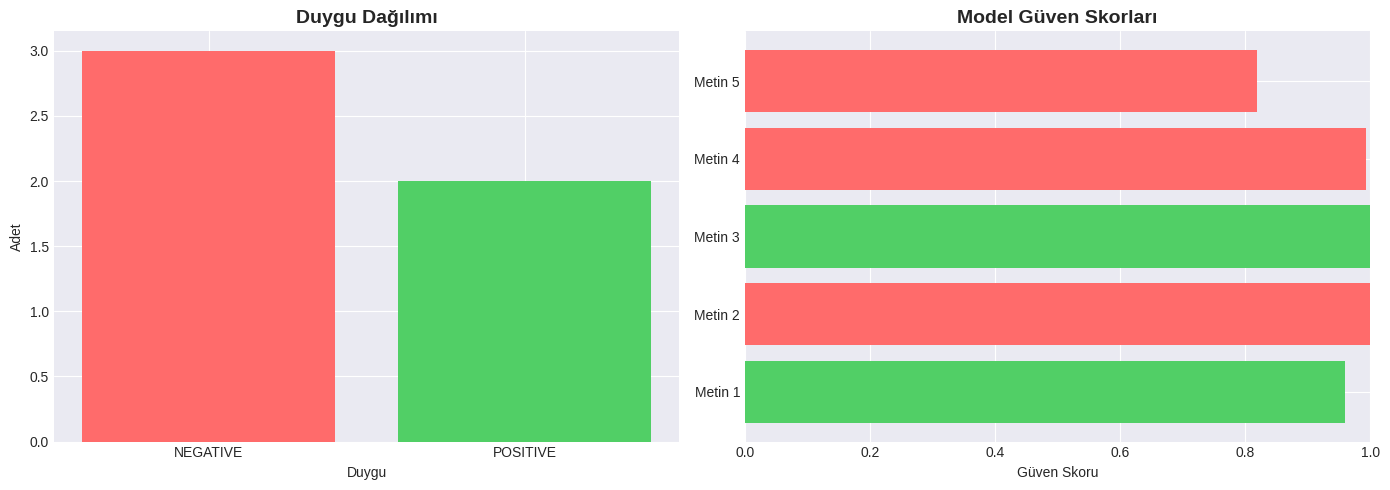


📊 DataFrame Görünümü:
                                               Metin     Duygu  Güven_Skoru
0  I've been waiting for a HuggingFace course my ...  POSITIVE     0.959805
1                               I hate this so much!  NEGATIVE     0.999456
2  This product is absolutely amazing! Best purch...  POSITIVE     0.999880
3          Terrible experience, would not recommend.  NEGATIVE     0.993355
4                        It's okay, nothing special.  NEGATIVE     0.818963


In [5]:
# Sonuçları DataFrame'e çevirelim (daha kolay analiz için)
df_duygu = pd.DataFrame({
    'Metin': test_metinler,
    'Duygu': [s['label'] for s in sonuclar],
    'Güven_Skoru': [s['score'] for s in sonuclar]
})

# Görselleştirme
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Grafik 1: Duygu Dağılımı
duygu_sayilari = df_duygu['Duygu'].value_counts()
ax[0].bar(duygu_sayilari.index, duygu_sayilari.values, color=['#ff6b6b', '#51cf66'])
ax[0].set_title('Duygu Dağılımı', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Duygu')
ax[0].set_ylabel('Adet')

# Grafik 2: Güven Skorları
colors = ['#51cf66' if d == 'POSITIVE' else '#ff6b6b' for d in df_duygu['Duygu']]
ax[1].barh(range(len(df_duygu)), df_duygu['Güven_Skoru'], color=colors)
ax[1].set_yticks(range(len(df_duygu)))
ax[1].set_yticklabels([f"Metin {i+1}" for i in range(len(df_duygu))])
ax[1].set_xlabel('Güven Skoru')
ax[1].set_title('Model Güven Skorları', fontsize=14, fontweight='bold')
ax[1].set_xlim([0, 1])

plt.tight_layout()
plt.show()

print("\n📊 DataFrame Görünümü:")
print(df_duygu)

---

# 2️⃣ Sıfır-Atış Sınıflandırma (Zero-Shot Classification)

## 📖 Nedir?

Model önceden bu kategoriler üzerinde eğitilmemiş olsa bile, metinleri istediğiniz kategorilere ayırabilir.

## 🎯 Avantajları:

- ✅ **Esneklik:** Kategorileri dilediğiniz gibi tanımlayabilirsiniz
- ✅ **Hız:** Yeni bir model eğitmeye gerek yok
- ✅ **Maliyet:** Veri toplama ve eğitim maliyeti yok

## 💡 Kullanım Senaryoları:

- Müşteri taleplerinizi departmanlara yönlendirme
- Haber makalelerini kategorilere ayırma
- E-postaları otomatik etiketleme

In [6]:
from transformers import pipeline

# Zero-shot classification pipeline'ı oluştur
# Varsayılan model: facebook/bart-large-mnli
classifier = pipeline("zero-shot-classification")

print("✅ Sıfır-atış sınıflandırma modeli hazır!")

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Sıfır-atış sınıflandırma modeli hazır!


In [7]:
# Farklı metinleri farklı kategorilere göre sınıflandıralım

test_metinleri = [
    "This is a course about the Transformers library",
    "I just bought a new laptop with amazing graphics card",
    "The stock market crashed today, investors are worried",
    "Scientists discovered a new species in the Amazon rainforest",
    "The new restaurant downtown has incredible Italian food"
]

kategoriler = ["education", "politics", "business", "technology", "science", "food"]

print("🔍 SIFIR-ATIŞ SINIFLANDIRMA SONUÇLARI\n" + "="*70)

for i, metin in enumerate(test_metinleri, 1):
    sonuc = classifier(metin, candidate_labels=kategoriler)

    print(f"\n{i}. Metin: '{metin}'")
    print(f"   🏆 En Olası Kategori: {sonuc['labels'][0]} ({sonuc['scores'][0]*100:.2f}%)")
    print(f"   📊 Tüm Skorlar:")
    for label, score in zip(sonuc['labels'][:3], sonuc['scores'][:3]):
        print(f"      - {label}: {score*100:.2f}%")

🔍 SIFIR-ATIŞ SINIFLANDIRMA SONUÇLARI

1. Metin: 'This is a course about the Transformers library'
   🏆 En Olası Kategori: technology (47.77%)
   📊 Tüm Skorlar:
      - technology: 47.77%
      - education: 36.47%
      - science: 6.34%

2. Metin: 'I just bought a new laptop with amazing graphics card'
   🏆 En Olası Kategori: technology (95.04%)
   📊 Tüm Skorlar:
      - technology: 95.04%
      - business: 2.46%
      - science: 0.79%

3. Metin: 'The stock market crashed today, investors are worried'
   🏆 En Olası Kategori: business (87.57%)
   📊 Tüm Skorlar:
      - business: 87.57%
      - science: 3.27%
      - technology: 3.12%

4. Metin: 'Scientists discovered a new species in the Amazon rainforest'
   🏆 En Olası Kategori: science (95.97%)
   📊 Tüm Skorlar:
      - science: 95.97%
      - technology: 1.27%
      - business: 1.01%

5. Metin: 'The new restaurant downtown has incredible Italian food'
   🏆 En Olası Kategori: food (89.00%)
   📊 Tüm Skorlar:
      - food: 89.00%
      -

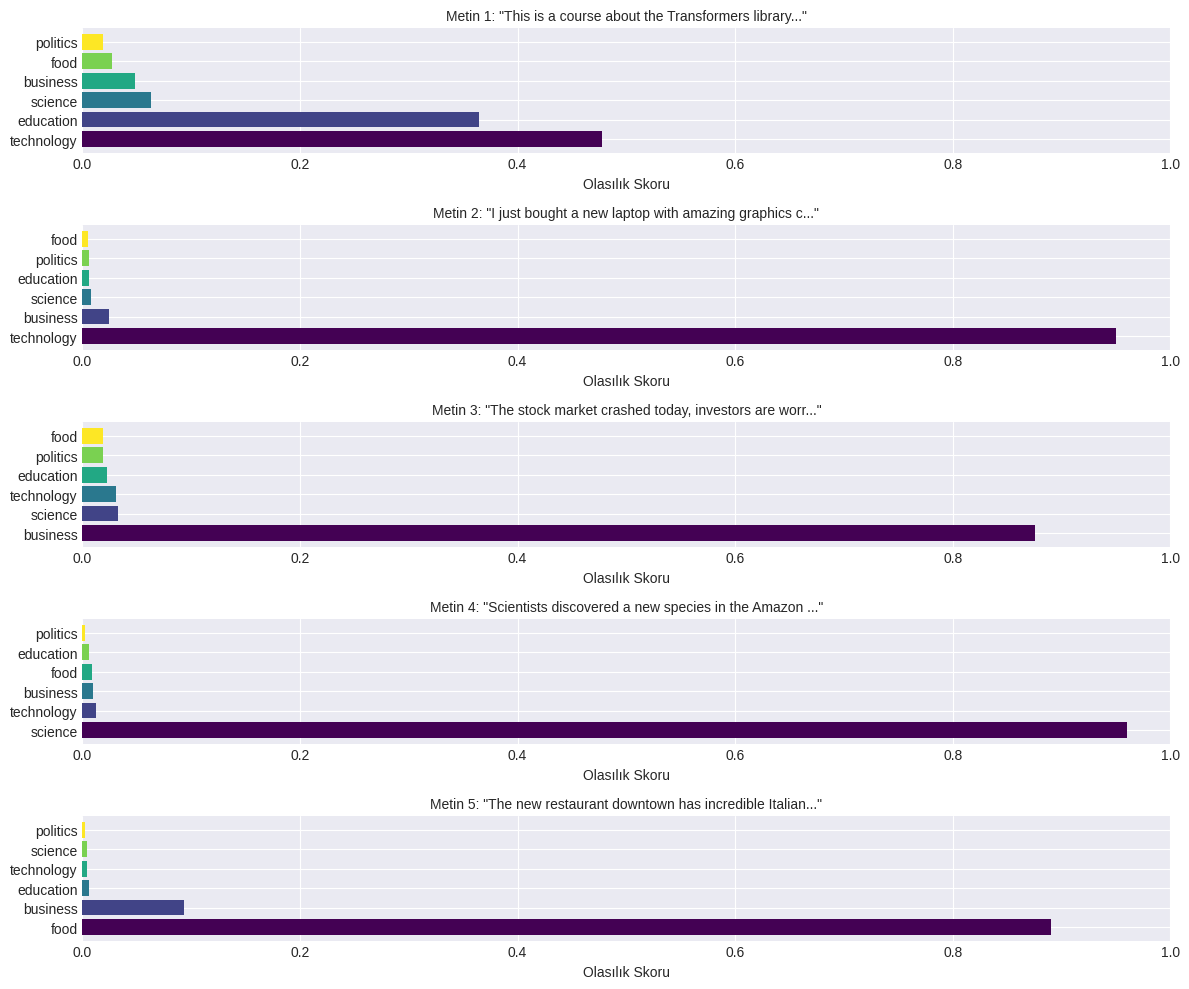

In [8]:
# Sonuçları görselleştirelim
fig, axes = plt.subplots(len(test_metinleri), 1, figsize=(12, 10))

for idx, metin in enumerate(test_metinleri):
    sonuc = classifier(metin, candidate_labels=kategoriler)

    # Her metin için bar chart
    axes[idx].barh(sonuc['labels'], sonuc['scores'], color=plt.cm.viridis(np.linspace(0, 1, len(kategoriler))))
    axes[idx].set_xlabel('Olasılık Skoru')
    axes[idx].set_title(f'Metin {idx+1}: "{metin[:50]}..."', fontsize=10)
    axes[idx].set_xlim([0, 1])

plt.tight_layout()
plt.show()

---

# 3️⃣ Metin Üretimi (Text Generation)

## 📖 Nedir?

Verilen bir başlangıç metnine dayanarak, anlamlı ve tutarlı devam metinleri üretme yeteneğidir.

## 🎯 Kullanım Alanları:

- **İçerik Üretimi:** Blog yazıları, sosyal medya paylaşımları
- **Yaratıcı Yazarlık:** Hikaye, şiir oluşturma
- **Kod Tamamlama:** GitHub Copilot benzeri uygulamalar
- **Chatbot'lar:** Diyalog üretimi

## 🤖 Popüler Modeller

In [9]:
from transformers import pipeline

generator = pipeline("text-generation") # varsayılan olarak GPT-2 kullanır

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [10]:
from transformers import pipeline

# DistilGPT2: GPT-2'nin daha hızlı ve hafif versiyonu
# %40 daha hızlı, %40 daha az parametre, benzer performans
generator = pipeline("text-generation", model="distilgpt2")

print("✅ Metin üretim modeli yüklendi!")
print(f"📊 Model: {generator.model.name_or_path}")
print(f"🔢 Parametre sayısı: ~82M")

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


✅ Metin üretim modeli yüklendi!
📊 Model: distilgpt2
🔢 Parametre sayısı: ~82M


**kullanılabilecek farklı modeller:**

| Amaç | Model Önerisi | Açıklama |
|------|---------------|----------|
| **Hızlı ve hafif** | `distilgpt2`, `gpt2` | Başlangıç seviyesi, düşük kaynak tüketimi |
| **Daha iyi kalite** | `gpt2-large`, `gpt2-xl` | Daha tutarlı ve akıcı metinler |
| **Yeni nesil güçlü modeller** | `mistralai/Mistral-7B-Instruct` | State-of-the-art performans |
| **Uzun hikaye üretimi** | `mosaicml/mpt-7b-storywriter` | Uzun tutarlı anlatılar için optimize |
| **Open-source GPT-3** | `EleutherAI/gpt-neo-2.7B` | Büyük ölçekli model, yüksek kalite |

> 💡 **İpucu:** Daha büyük modeller daha iyi sonuç verir ancak daha fazla RAM ve işlem gücü gerektirir.

In [12]:
# Farklı parametrelerle metin üretimi deneyelim

prompts = [
    "In this course, we will teach you how to",
    "The future of artificial intelligence is",
    "Once upon a time in a magical forest,"
]

print("✍️ METİN ÜRETİMİ ÖRNEKLERİ\n" + "="*80)

for i, prompt in enumerate(prompts, 1):
    print(f"\n{'='*80}")
    print(f"🎯 Prompt {i}: {prompt}")
    print(f"{'='*80}")

    # max_length: Toplam çıktı uzunluğu (prompt + üretilen)
    # num_return_sequences: Kaç farklı varyasyon üretilsin
    # temperature: Yaratıcılık seviyesi (0.7-1.0 arası dengeli)
    # top_k: En olası k kelime arasından seç
    # top_p: Nucleus sampling - kümülatif olasılık eşiği

    sonuclar = generator(
        prompt,
        max_length=50,           # Maksimum 50 token
        num_return_sequences=2,  # 2 farklı sonuç
        temperature=0.8,         # Orta seviye yaratıcılık
        top_k=50,               # Top 50 kelime havuzu
        top_p=0.95,             # %95 olasılık kümesi
        do_sample=True,         # Deterministik değil, örnekleme yap
        pad_token_id=generator.tokenizer.eos_token_id  # Padding için
    )

    for j, sonuc in enumerate(sonuclar, 1):
        print(f"\n   Varyasyon {j}:")
        print(f"   {sonuc['generated_text']}")
        print(f"   {'-'*76}")

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


✍️ METİN ÜRETİMİ ÖRNEKLERİ

🎯 Prompt 1: In this course, we will teach you how to


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



   Varyasyon 1:
   In this course, we will teach you how to read through a variety of topics and learn what to do next.
   ----------------------------------------------------------------------------

   Varyasyon 2:
   In this course, we will teach you how to use and use the tools needed for your own purposes. We will not be talking about the tools, but we will not talk about their effectiveness.





If you have any suggestions, comments or thoughts, feel free to contact us at bsmiths@gmail.com

Also see:
http://www.youtube.com/watch?v=o0lYbKxBK8
If you have any questions, feel free to contact us at bsmiths@gmail.com
   ----------------------------------------------------------------------------

🎯 Prompt 2: The future of artificial intelligence is


Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)



   Varyasyon 1:
   The future of artificial intelligence is still a subject for discussion and debate. But at least one of the key issues for researchers is a growing understanding of the implications of AI's potential.


































































































































































































































   ----------------------------------------------------------------------------

   Varyasyon 2:
   The future of artificial intelligence is not yet ready. As of this writing, the top 10 most advanced technologies are currently being developed by some top technology companies.




The US is now working closely with Google to develop a new artificial intelligence (AI) capable of predicting an entire world. The company has also worked closely with other companies, including Google, to develop AI-based services.
The company is working closely with co

### 🎛️ Parametre Açıklamaları

| Parametre | Açıklama | Önerilen Değer |
|-----------|----------|----------------|
| `max_length` | Üretilecek maksimum token sayısı | 50-100 (kısa), 200-500 (uzun) |
| `num_return_sequences` | Kaç farklı varyasyon | 1-3 arası |
| `temperature` | Yaratıcılık (düşük=tutarlı, yüksek=yaratıcı) | 0.7-0.9 arası dengeli |
| `top_k` | En olası K kelime arasından seç | 40-50 |
| `top_p` | Nucleus sampling eşiği | 0.9-0.95 |
| `do_sample` | Örnekleme yapılsın mı? | True (çeşitlilik için) |

---

# 4️⃣ Maskeli Kelime Tahmini (Fill-Mask / Masked Language Modeling)

## 📖 Nedir?

Bir cümledeki eksik (maskelenmiş) kelimeleri tahmin etme yeteneğidir. BERT ve benzeri modellerin temel eğitim görevidir.

## 🎯 Kullanım Alanları:

- **Otomatik Tamamlama:** Arama motorları, metin editörleri
- **Yazım Denetimi:** Bağlama uygun kelime önerileri
- **Veri Arttırma:** Eğitim veri setini çeşitlendirme
- **Kelime Tahmini:** Eksik bilgileri tamamlama

## 🔍 Nasıl Çalışır?

Model, cümlenin bağlamını analiz ederek en olası kelimeleri önerir.

Kelime tahmini, boşluk doldurma, veri arttırma (augmentation) amacıyla maskelenmiş kelimelerle veri çeşitlendirme uygulamlarında kullanılır.

In [17]:
from transformers import pipeline

# BERT-base-cased: Büyük-küçük harf duyarlı BERT modeli
# Maskeli kelime tahmini için fine-tune edilmiş
unmasker = pipeline("fill-mask", model="bert-base-cased")

print("✅ Maskeli kelime tahmini modeli yüklendi!")
print(f"📊 Model: {unmasker.model.name_or_path}")
print(f"🎭 Mask Token: {unmasker.tokenizer.mask_token}")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


✅ Maskeli kelime tahmini modeli yüklendi!
📊 Model: bert-base-cased
🎭 Mask Token: [MASK]


**kullanılabilecek farklı modeller:**

| Model | Avantajı | Kullanım Durumu |
|-------|----------|-----------------|
| `bert-base-cased` | Standart BERT, büyük-küçük harf duyarlı | Genel amaçlı kullanım |
| `bert-base-uncased` | Büyük-küçük harf duyarsız | Genel metin işleme |
| `roberta-base` | BERT'ten daha optimize, daha iyi performans | Yüksek doğruluk gereken işler |
| `deberta-base` | Daha yeni mimari, state-of-the-art | En iyi sonuçlar için |
| `distilbert-base` | %40 daha küçük, %60 daha hızlı | Hız önemli olduğunda |
| `xlm-roberta-base` | 100+ dilde çalışır | Çok dilli uygulamalar |
| `albert-base-v2` | Daha az parametre, hafif model | Kaynak kısıtlı ortamlar |

In [18]:
test_cumleleri = [
    "This course will teach you all about [MASK] models.",
    "The capital of France is [MASK].",
    "I love to drink [MASK] in the morning.",
    "Python is a popular [MASK] language.",
    "The best way to learn is by [MASK]."
]

print("🎭 MASKELİ KELİME TAHMİNİ SONUÇLARI\n" + "="*80)

for i, cumle in enumerate(test_cumleleri, 1):
    print(f"\n{'='*80}")
    print(f"📝 Cümle {i}: {cumle}")
    print(f"{'='*80}")

    # top_k: En olası k kelimeyi getir
    tahminler = unmasker(cumle, top_k=5)

    print(f"\n🔝 En Olası 5 Kelime:")
    for j, tahmin in enumerate(tahminler, 1):
        # Tahmin edilen kelimeyi cümlede yerine koy
        tamamlanmis = tahmin['sequence']
        skor = tahmin['score']
        kelime = tahmin['token_str']

        print(f"   {j}. '{kelime}' - Skor: {skor:.4f} ({skor*100:.2f}%)")
        print(f"      ➜ {tamamlanmis}")

    print()

🎭 MASKELİ KELİME TAHMİNİ SONUÇLARI

📝 Cümle 1: This course will teach you all about [MASK] models.

🔝 En Olası 5 Kelime:
   1. 'role' - Skor: 0.2596 (25.96%)
      ➜ This course will teach you all about role models.
   2. 'the' - Skor: 0.0943 (9.43%)
      ➜ This course will teach you all about the models.
   3. 'fashion' - Skor: 0.0339 (3.39%)
      ➜ This course will teach you all about fashion models.
   4. 'life' - Skor: 0.0259 (2.59%)
      ➜ This course will teach you all about life models.
   5. 'these' - Skor: 0.0231 (2.31%)
      ➜ This course will teach you all about these models.


📝 Cümle 2: The capital of France is [MASK].

🔝 En Olası 5 Kelime:
   1. 'Paris' - Skor: 0.4447 (44.47%)
      ➜ The capital of France is Paris.
   2. 'Lyon' - Skor: 0.0940 (9.40%)
      ➜ The capital of France is Lyon.
   3. 'Toulouse' - Skor: 0.0823 (8.23%)
      ➜ The capital of France is Toulouse.
   4. 'Lille' - Skor: 0.0752 (7.52%)
      ➜ The capital of France is Lille.
   5. 'Marseille' - S

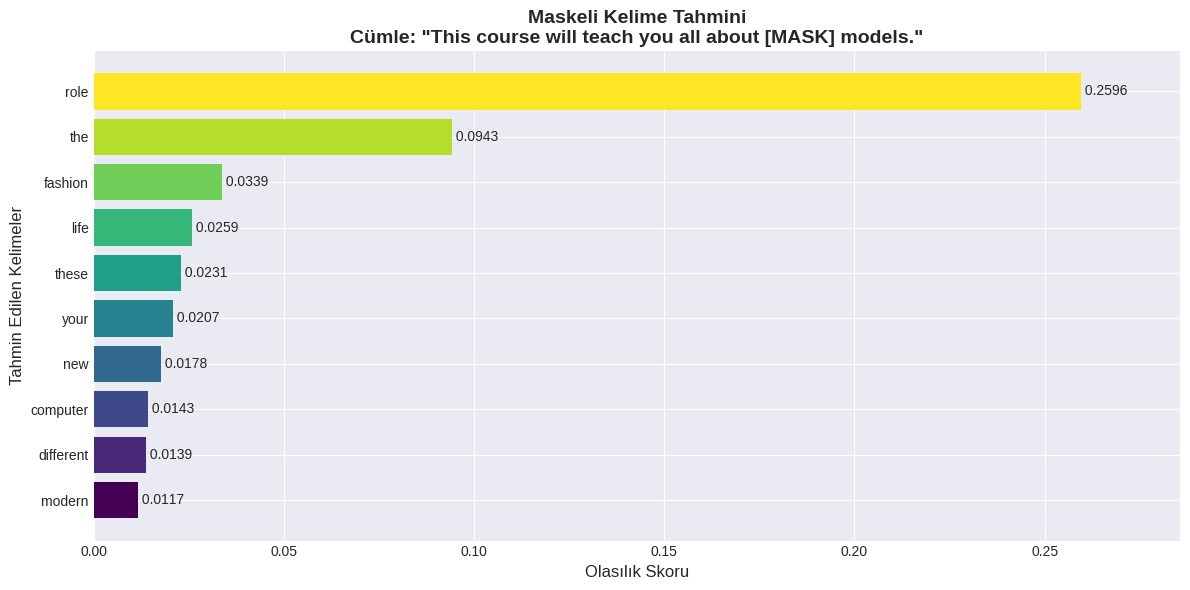

In [19]:
# İlk cümle için tahminleri görselleştirelim
ornek_cumle = test_cumleleri[0]
tahminler = unmasker(ornek_cumle, top_k=10)

# Veri hazırlama
kelimeler = [t['token_str'].strip() for t in tahminler]
skorlar = [t['score'] for t in tahminler]

# Görselleştirme
plt.figure(figsize=(12, 6))
bars = plt.barh(kelimeler[::-1], skorlar[::-1], color=plt.cm.viridis(np.linspace(0, 1, len(kelimeler))))
plt.xlabel('Olasılık Skoru', fontsize=12)
plt.ylabel('Tahmin Edilen Kelimeler', fontsize=12)
plt.title(f'Maskeli Kelime Tahmini\nCümle: "{ornek_cumle}"', fontsize=14, fontweight='bold')
plt.xlim([0, max(skorlar) * 1.1])

# Değerleri bar'ların üzerine yaz
for i, (bar, skor) in enumerate(zip(bars, skorlar[::-1])):
    plt.text(skor, bar.get_y() + bar.get_height()/2, f' {skor:.4f}',
             va='center', fontsize=10)

plt.tight_layout()
plt.show()

---

# 5️⃣ Adlandırılmış Varlık Tanıma (Named Entity Recognition - NER)

## 📖 Nedir?

Metinlerdeki özel isimleri (kişi, yer, kurum vb.) tespit etme ve sınıflandırma işlemidir.

## 🏷️ Yaygın Varlık Tipleri:

| Etiket | Açıklama | Örnek |
|--------|----------|-------|
| **PER** | Kişi adları | Albert Einstein, Marie Curie |
| **LOC** | Yer adları | Paris, Amazon River, Mount Everest |
| **ORG** | Organizasyonlar/Kurumlar | Google, United Nations, MIT |
| **DATE** | Tarih ifadeleri | 2024, January 15th, yesterday |
| **TIME** | Zaman ifadeleri | 3:00 PM, morning, tonight |
| **MONEY** | Para birimi | $100, 50 euros, £25 |
| **PERCENT** | Yüzde | 50%, 3.14% |
| **MISC** | Diğer varlıklar | COVID-19, Nobel Prize |

## 🎯 Kullanım Alanları:

- 📰 **Haber Analizi:** Haber metinlerinden bilgi çıkarma
- 🔍 **Bilgi Çıkarımı:** Yapılandırılmış veri oluşturma
- 🤖 **Chatbot'lar:** Kullanıcı sorgularından bilgi alma
- 📊 **İş Zekası:** Raporlardan içgörü çıkarma

👤 Kişi adları (PER)

🌍 Yer adları (LOC)

🏢 Kurumlar (ORG)

🕒 Tarih-saat gibi zaman ifadeleri (DATE, TIME)

💰 Para, yüzde gibi sayısal ifadeler (MONEY, PERCENT)

In [20]:
from transformers import pipeline

# NER pipeline oluştur
# grouped_entities=True: Aynı varlığın birden fazla token'ını birleştir
# Örn: "New" ve "York" ayrı ayrı değil "New York" olarak grupla
ner = pipeline("ner", grouped_entities=True)

print("✅ NER modeli yüklendi!")
print(f"📊 Model: {ner.model.name_or_path}")
print(f"🏷️ Tanıyabileceği varlık tipleri: PER, LOC, ORG, MISC")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ NER modeli yüklendi!
📊 Model: dbmdz/bert-large-cased-finetuned-conll03-english
🏷️ Tanıyabileceği varlık tipleri: PER, LOC, ORG, MISC


In [21]:
# Farklı metinler üzerinde NER uygulayalım

test_metinler = [
    "My name is Sylvain and I work at Hugging Face in Brooklyn.",
    "Apple Inc. was founded by Steve Jobs in California on April 1, 1976.",
    "The Eiffel Tower in Paris, France was completed in 1889.",
    "Dr. Jane Smith from MIT published a groundbreaking paper in Nature magazine.",
    "Amazon acquired Whole Foods for $13.7 billion in 2017."
]

print("🔍 ADLANDIRILMIŞ VARLIK TANIMA SONUÇLARI\n" + "="*80)

tum_varliklar = []  # Tüm varlıkları toplama

for i, metin in enumerate(test_metinler, 1):
    print(f"\n{'='*80}")
    print(f"📝 Metin {i}: {metin}")
    print(f"{'='*80}")

    varliklar = ner(metin)

    if varliklar:
        print(f"\n🎯 Tespit Edilen Varlıklar ({len(varliklar)} adet):")
        for varlik in varliklar:
            kelime = varlik['word']
            tip = varlik['entity_group']
            skor = varlik['score']

            # Emoji ile tip gösterimi
            emoji_map = {
                'PER': '👤',
                'LOC': '🌍',
                'ORG': '🏢',
                'MISC': '📌'
            }
            emoji = emoji_map.get(tip, '❓')

            print(f"   {emoji} [{tip}] '{kelime}' - Güven: {skor:.4f} ({skor*100:.1f}%)")

            # DataFrame için kaydet
            tum_varliklar.append({
                'Metin_No': i,
                'Varlık': kelime,
                'Tip': tip,
                'Güven_Skoru': skor
            })
    else:
        print("   ℹ️ Varlık bulunamadı.")

print(f"\n{'='*80}")
print(f"📊 Toplam {len(tum_varliklar)} varlık tespit edildi.")

🔍 ADLANDIRILMIŞ VARLIK TANIMA SONUÇLARI

📝 Metin 1: My name is Sylvain and I work at Hugging Face in Brooklyn.

🎯 Tespit Edilen Varlıklar (3 adet):
   👤 [PER] 'Sylvain' - Güven: 0.9982 (99.8%)
   🏢 [ORG] 'Hugging Face' - Güven: 0.9796 (98.0%)
   🌍 [LOC] 'Brooklyn' - Güven: 0.9932 (99.3%)

📝 Metin 2: Apple Inc. was founded by Steve Jobs in California on April 1, 1976.

🎯 Tespit Edilen Varlıklar (3 adet):
   🏢 [ORG] 'Apple Inc' - Güven: 0.9996 (100.0%)
   👤 [PER] 'Steve Jobs' - Güven: 0.9905 (99.0%)
   🌍 [LOC] 'California' - Güven: 0.9996 (100.0%)

📝 Metin 3: The Eiffel Tower in Paris, France was completed in 1889.

🎯 Tespit Edilen Varlıklar (4 adet):
   📌 [MISC] 'Eiffel' - Güven: 0.5876 (58.8%)
   🌍 [LOC] 'Tower' - Güven: 0.4952 (49.5%)
   🌍 [LOC] 'Paris' - Güven: 0.9996 (100.0%)
   🌍 [LOC] 'France' - Güven: 0.9997 (100.0%)

📝 Metin 4: Dr. Jane Smith from MIT published a groundbreaking paper in Nature magazine.

🎯 Tespit Edilen Varlıklar (3 adet):
   👤 [PER] 'Jane Smith' - Güven: 0.9996

📊 NER Analiz Özeti:

Varlık Tipine Göre Dağılım:
Tip
ORG     6
LOC     5
PER     3
MISC    1
Name: count, dtype: int64

Ortalama Güven Skorları:
Tip
PER     0.996089
ORG     0.993944
LOC     0.897457
MISC    0.587563
Name: Güven_Skoru, dtype: float32


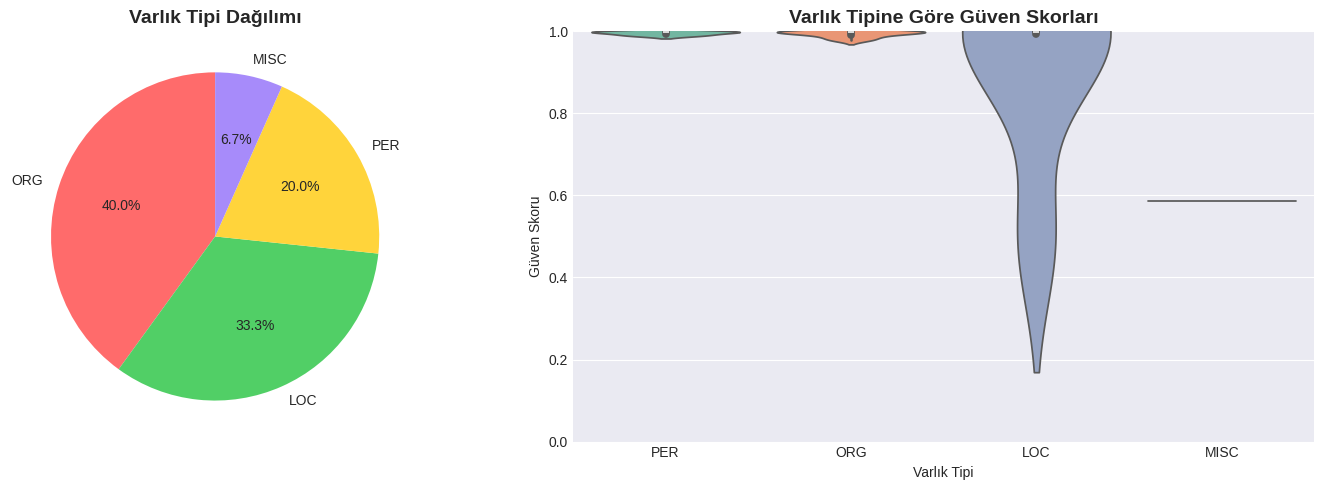


📋 Detaylı DataFrame:
 Metin_No       Varlık  Tip  Güven_Skoru
        1      Sylvain  PER     0.998169
        1 Hugging Face  ORG     0.979602
        1     Brooklyn  LOC     0.993211
        2    Apple Inc  ORG     0.999588
        2   Steve Jobs  PER     0.990470
        2   California  LOC     0.999638
        3       Eiffel MISC     0.587563
        3        Tower  LOC     0.495171
        3        Paris  LOC     0.999568
        3       France  LOC     0.999698
        4   Jane Smith  PER     0.999628
        4          MIT  ORG     0.997002
        4       Nature  ORG     0.988708
        5       Amazon  ORG     0.999460
        5  Whole Foods  ORG     0.999306


In [22]:
# Sonuçları DataFrame'e çevir ve analiz et
df_varliklar = pd.DataFrame(tum_varliklar)

print("📊 NER Analiz Özeti:")
print(f"\nVarlık Tipine Göre Dağılım:")
print(df_varliklar['Tip'].value_counts())

print(f"\nOrtalama Güven Skorları:")
print(df_varliklar.groupby('Tip')['Güven_Skoru'].mean().sort_values(ascending=False))

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Grafik 1: Varlık Tipi Dağılımı
tip_sayilari = df_varliklar['Tip'].value_counts()
colors = ['#ff6b6b', '#51cf66', '#ffd43b', '#a78bfa']
axes[0].pie(tip_sayilari.values, labels=tip_sayilari.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[0].set_title('Varlık Tipi Dağılımı', fontsize=14, fontweight='bold')

# Grafik 2: Güven Skorları (Violin Plot)
import seaborn as sns
sns.violinplot(data=df_varliklar, x='Tip', y='Güven_Skoru', ax=axes[1], palette='Set2')
axes[1].set_title('Varlık Tipine Göre Güven Skorları', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Varlık Tipi')
axes[1].set_ylabel('Güven Skoru')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n📋 Detaylı DataFrame:")
print(df_varliklar.to_string(index=False))

---

# 6️⃣ Soru-Cevap Sistemleri (Question Answering)

## 📖 Nedir?

Verilen bir bağlam (context) metni içinden sorunun cevabını bulma yeteneğidir.

## 🎯 Kullanım Alanları:

- 📚 **Eğitim:** Otomatik ders asistanları
- 💼 **Müşteri Hizmetleri:** FAQ otomasyonu
- 🔍 **Bilgi Erişimi:** Dokümanlarda hızlı arama
- 🏥 **Sağlık:** Tıbbi raporlardan bilgi çıkarma

## ⚙️ Nasıl Çalışır?

1. Model bağlam metnini ve soruyu alır
2. Bağlamda cevabın başlangıç ve bitiş pozisyonlarını tahmin eder
3. En yüksek skorlu cevap aralığını döndürür

In [23]:
from transformers import pipeline

# Question-Answering pipeline oluştur
# Varsayılan model: distilbert-base-cased-distilled-squad
# SQuAD (Stanford Question Answering Dataset) üzerinde eğitilmiş
question_answerer = pipeline("question-answering")

print("✅ Soru-Cevap modeli yüklendi!")
print(f"📊 Model: {question_answerer.model.name_or_path}")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Soru-Cevap modeli yüklendi!
📊 Model: distilbert/distilbert-base-cased-distilled-squad


In [24]:
# Kapsamlı bir bağlam metni oluşturalım
context = """
Hugging Face is a company founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf.
The company is based in New York City and Paris. Hugging Face is best known for its Transformers
library, which provides thousands of pre-trained models for Natural Language Processing (NLP) tasks.
The library supports PyTorch, TensorFlow, and JAX frameworks. In 2021, Hugging Face raised $40 million
in Series B funding, bringing its total funding to $60 million. The company has over 100 employees
and serves millions of developers worldwide. Their mission is to democratize AI and make it accessible
to everyone. The Transformers library has been downloaded over 50 million times and is used by major
companies including Google, Facebook, Microsoft, and Amazon.
"""

# Farklı sorular soralım
sorular = [
    "When was Hugging Face founded?",
    "Who are the founders of Hugging Face?",
    "Where is Hugging Face based?",
    "What is Hugging Face best known for?",
    "How much funding did Hugging Face raise in 2021?",
    "How many times has the Transformers library been downloaded?",
    "What is Hugging Face's mission?"
]

print("❓ SORU-CEVAP SİSTEMİ ÖRNEKLERİ\n" + "="*80)
print(f"📄 Bağlam Metni:\n{context}\n")
print("="*80)

cevaplar = []

for i, soru in enumerate(sorular, 1):
    sonuc = question_answerer(question=soru, context=context)

    print(f"\n{i}. ❓ Soru: {soru}")
    print(f"   ✅ Cevap: {sonuc['answer']}")
    print(f"   📊 Güven Skoru: {sonuc['score']:.4f} ({sonuc['score']*100:.2f}%)")
    print(f"   📍 Pozisyon: Başlangıç={sonuc['start']}, Bitiş={sonuc['end']}")

    cevaplar.append({
        'Soru': soru,
        'Cevap': sonuc['answer'],
        'Skor': sonuc['score']
    })

❓ SORU-CEVAP SİSTEMİ ÖRNEKLERİ
📄 Bağlam Metni:

Hugging Face is a company founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf. 
The company is based in New York City and Paris. Hugging Face is best known for its Transformers 
library, which provides thousands of pre-trained models for Natural Language Processing (NLP) tasks. 
The library supports PyTorch, TensorFlow, and JAX frameworks. In 2021, Hugging Face raised $40 million 
in Series B funding, bringing its total funding to $60 million. The company has over 100 employees 
and serves millions of developers worldwide. Their mission is to democratize AI and make it accessible 
to everyone. The Transformers library has been downloaded over 50 million times and is used by major 
companies including Google, Facebook, Microsoft, and Amazon.



1. ❓ Soru: When was Hugging Face founded?
   ✅ Cevap: 2016
   📊 Güven Skoru: 0.9792 (97.92%)
   📍 Pozisyon: Başlangıç=38, Bitiş=42

2. ❓ Soru: Who are the founders of Hugging Face?

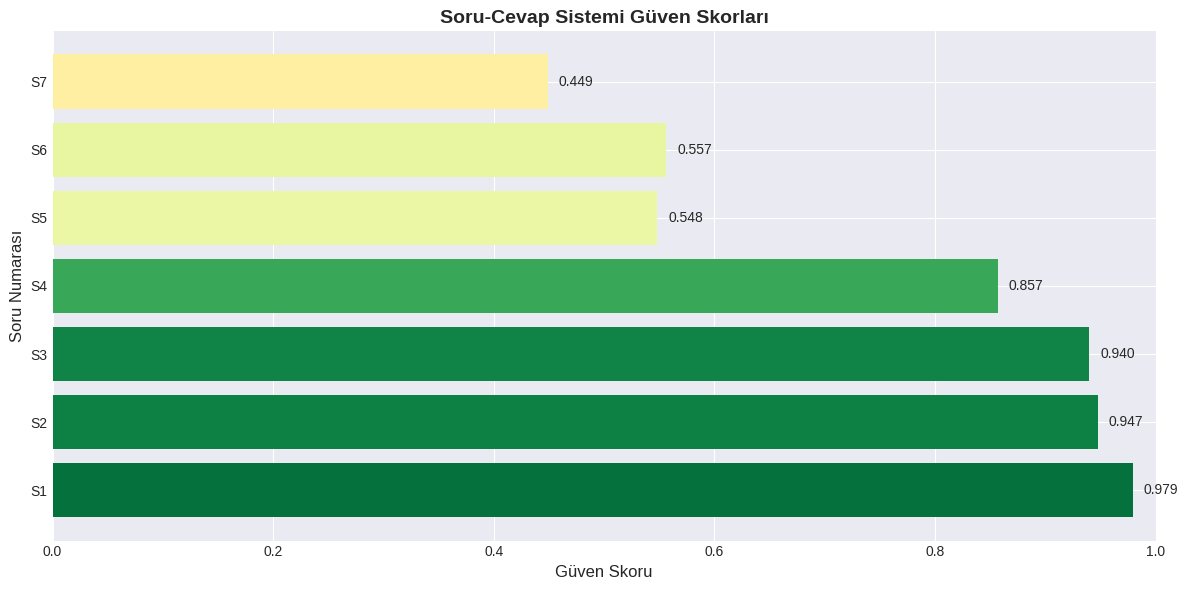


📊 Tüm Sorular ve Cevaplar:

1. When was Hugging Face founded?
   → 2016 (Skor: 0.9792)

2. Who are the founders of Hugging Face?
   → Clément Delangue, Julien Chaumond, and Thomas Wolf (Skor: 0.9474)

3. Where is Hugging Face based?
   → New York City and Paris (Skor: 0.9397)

4. What is Hugging Face best known for?
   → Transformers 
library (Skor: 0.8570)

5. How much funding did Hugging Face raise in 2021?
   → $40 million (Skor: 0.5480)

6. How many times has the Transformers library been downloaded?
   → over 50 million (Skor: 0.5565)

7. What is Hugging Face's mission?
   → to democratize AI and make it accessible 
to everyone (Skor: 0.4489)


In [25]:
# Cevapları DataFrame'e çevir ve görselleştir
df_qa = pd.DataFrame(cevaplar)

# Görselleştirme
plt.figure(figsize=(12, 6))
bars = plt.barh(range(len(df_qa)), df_qa['Skor'], color=plt.cm.RdYlGn(df_qa['Skor']))
plt.yticks(range(len(df_qa)), [f"S{i+1}" for i in range(len(df_qa))])
plt.xlabel('Güven Skoru', fontsize=12)
plt.ylabel('Soru Numarası', fontsize=12)
plt.title('Soru-Cevap Sistemi Güven Skorları', fontsize=14, fontweight='bold')
plt.xlim([0, 1])

# Değerleri bars üzerine yaz
for i, (bar, skor) in enumerate(zip(bars, df_qa['Skor'])):
    plt.text(skor + 0.01, bar.get_y() + bar.get_height()/2,
             f'{skor:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 Tüm Sorular ve Cevaplar:")
for idx, row in df_qa.iterrows():
    print(f"\n{idx+1}. {row['Soru']}")
    print(f"   → {row['Cevap']} (Skor: {row['Skor']:.4f})")

---

# 7️⃣ Metin Özetleme (Text Summarization)

## 📖 Nedir?

Uzun metinleri, ana fikirlerini koruyarak kısa ve öz hale getirme işlemidir.

## 🎯 İki Temel Yaklaşım:

1. **Extractive (Çıkarımsal):** Metnin önemli cümlelerini seçer ve birleştirir
2. **Abstractive (Soyutlayıcı):** Metni anlar ve yeni cümlelerle özetler (daha gelişmiş)

## 💡 Kullanım Alanları:

- 📰 **Haber Özetleme:** Uzun haberleri kısa özetlere dönüştürme
- 📄 **Doküman İşleme:** Raporları, makaleleri özetleme
- 📧 **E-posta Yönetimi:** Uzun e-postaları özetleme
- 🎓 **Akademik Araştırma:** Paper'ları hızlı tarama

In [26]:
from transformers import pipeline

# Summarization pipeline oluştur
# Varsayılan model: sshleifer/distilbart-cnn-12-6
# CNN/DailyMail veri seti üzerinde eğitilmiş
summarizer = pipeline("summarization")

print("✅ Metin özetleme modeli yüklendi!")
print(f"📊 Model: {summarizer.model.name_or_path}")
print(f"ℹ️ Bu model 'abstractive' (soyutlayıcı) özetleme yapar")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Metin özetleme modeli yüklendi!
📊 Model: sshleifer/distilbart-cnn-12-6
ℹ️ Bu model 'abstractive' (soyutlayıcı) özetleme yapar


In [27]:
# Örnek uzun metinler - farklı konularda

metin1_muhendislik = """
America has changed dramatically during recent years. Not only has the number of
graduates in traditional engineering disciplines such as mechanical, civil,
electrical, chemical, and aeronautical engineering declined, but in most of
the premier American universities engineering curricula now concentrate on
and encourage largely the study of engineering science. As a result, there
are declining offerings in engineering subjects dealing with infrastructure,
the environment, and related issues, and greater concentration on high
technology subjects, largely supporting increasingly complex scientific
developments. While the latter is important, it should not be at the expense
of more traditional engineering.

Rapidly developing economies such as China and India, as well as other
industrial countries in Europe and Asia, continue to encourage and advance
the teaching of engineering. Both China and India, respectively, graduate
six and eight times as many traditional engineers as does the United States.
Other industrial countries at minimum maintain their output, while America
suffers an increasingly serious decline in the number of engineering graduates
and a lack of well-educated engineers.
"""

metin2_yapay_zeka = """
Artificial Intelligence (AI) has become one of the most transformative technologies
of the 21st century. Machine learning, a subset of AI, enables computers to learn
from data without being explicitly programmed. Deep learning, which uses neural
networks with multiple layers, has revolutionized fields such as computer vision,
natural language processing, and speech recognition. Companies like Google, Amazon,
and Microsoft are investing billions of dollars in AI research and development.
However, there are also concerns about AI ethics, job displacement, and the potential
for bias in AI systems. Researchers and policymakers are working to address these
challenges while harnessing the benefits of AI for society. The future of AI holds
immense promise, from personalized medicine to autonomous vehicles, but it also
requires careful consideration of its societal impacts.
"""

metinler = [metin1_muhendislik, metin2_yapay_zeka]
konular = ["Mühendislik Eğitimi", "Yapay Zeka"]

print("📝 METİN ÖZETLEME ÖRNEKLERİ\n" + "="*80)

for i, (metin, konu) in enumerate(zip(metinler, konular), 1):
    print(f"\n{'='*80}")
    print(f"📄 Metin {i}: {konu}")
    print(f"{'='*80}")

    # Orijinal metin istatistikleri
    kelime_sayisi = len(metin.split())
    karakter_sayisi = len(metin)

    print(f"\n📊 Orijinal Metin İstatistikleri:")
    print(f"   • Kelime sayısı: {kelime_sayisi}")
    print(f"   • Karakter sayısı: {karakter_sayisi}")

    # Özetleme yap
    # min_length: Minimum özet uzunluğu
    # max_length: Maximum özet uzunluğu
    # do_sample: Örnekleme kullan (daha doğal sonuçlar)
    ozet = summarizer(
        metin,
        max_length=100,      # Maksimum 100 token
        min_length=30,       # Minimum 30 token
        do_sample=False      # Deterministik özet
    )

    ozet_metni = ozet[0]['summary_text']
    ozet_kelime = len(ozet_metni.split())
    ozet_karakter = len(ozet_metni)
    sikistirma_orani = (1 - ozet_kelime / kelime_sayisi) * 100

    print(f"\n📊 Özet İstatistikleri:")
    print(f"   • Kelime sayısı: {ozet_kelime}")
    print(f"   • Karakter sayısı: {ozet_karakter}")
    print(f"   • Sıkıştırma oranı: {sikistirma_orani:.1f}%")

    print(f"\n✨ Özet:")
    print(f"   {ozet_metni}")
    print()

📝 METİN ÖZETLEME ÖRNEKLERİ

📄 Metin 1: Mühendislik Eğitimi

📊 Orijinal Metin İstatistikleri:
   • Kelime sayısı: 169
   • Karakter sayısı: 1205

📊 Özet İstatistikleri:
   • Kelime sayısı: 41
   • Karakter sayısı: 247
   • Sıkıştırma oranı: 75.7%

✨ Özet:
    The number of engineering graduates in the United States has declined in recent years . China and India graduate six and eight times as many traditional engineers as the U.S. The U.N. has an increasingly serious decline in engineering graduates .


📄 Metin 2: Yapay Zeka

📊 Orijinal Metin İstatistikleri:
   • Kelime sayısı: 127
   • Karakter sayısı: 890

📊 Özet İstatistikleri:
   • Kelime sayısı: 51
   • Karakter sayısı: 323
   • Sıkıştırma oranı: 59.8%

✨ Özet:
    Artificial Intelligence (AI) has become one of the most transformative technologies of the 21st century . There are also concerns about AI ethics, job displacement, and the potential bias in AI systems . Researchers and policymakers are working to address these challenge

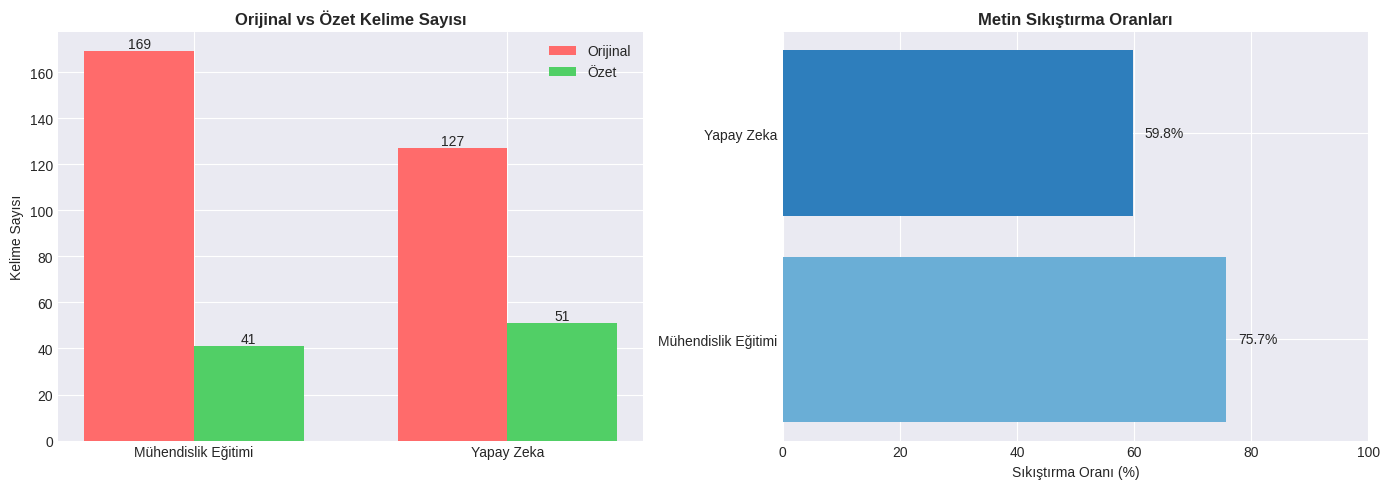

In [28]:
# Sıkıştırma oranlarını görselleştirelim
orijinal_kelimeler = [len(m.split()) for m in metinler]
ozet_kelimeler = []

for metin in metinler:
    ozet = summarizer(metin, max_length=100, min_length=30, do_sample=False)
    ozet_kelimeler.append(len(ozet[0]['summary_text'].split()))

# Grafik
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Grafik 1: Kelime Sayısı Karşılaştırması
x = np.arange(len(konular))
width = 0.35

bars1 = ax[0].bar(x - width/2, orijinal_kelimeler, width, label='Orijinal', color='#ff6b6b')
bars2 = ax[0].bar(x + width/2, ozet_kelimeler, width, label='Özet', color='#51cf66')

ax[0].set_ylabel('Kelime Sayısı')
ax[0].set_title('Orijinal vs Özet Kelime Sayısı', fontweight='bold')
ax[0].set_xticks(x)
ax[0].set_xticklabels(konular)
ax[0].legend()

# Değerleri bars üzerine yaz
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax[0].text(bar.get_x() + bar.get_width()/2., height,
                  f'{int(height)}', ha='center', va='bottom')

# Grafik 2: Sıkıştırma Oranı
sikistirma = [(1 - o/ori)*100 for o, ori in zip(ozet_kelimeler, orijinal_kelimeler)]
bars = ax[1].barh(konular, sikistirma, color=plt.cm.Blues([0.5, 0.7]))
ax[1].set_xlabel('Sıkıştırma Oranı (%)')
ax[1].set_title('Metin Sıkıştırma Oranları', fontweight='bold')
ax[1].set_xlim([0, 100])

for i, (bar, oran) in enumerate(zip(bars, sikistirma)):
    ax[1].text(oran + 2, bar.get_y() + bar.get_height()/2,
              f'{oran:.1f}%', va='center')

plt.tight_layout()
plt.show()

---

# 8️⃣ Makine Çevirisi (Machine Translation)

## 📖 Nedir?

Metinleri bir dilden başka bir dile otomatik olarak çevirme işlemidir.

## 🌍 Kullanım Alanları:

- 🌐 **Web Sitesi Yerelleştirme:** Çok dilli içerik üretimi
- 💬 **Anlık İletişim:** Farklı dillerdeki kullanıcılar arası iletişim
- 📚 **Doküman Çevirisi:** Teknik dokümanları çevirme
- 🎓 **Eğitim:** Dil öğrenme desteği

## 🔧 Popüler Çeviri Modelleri

In [29]:
from transformers import pipeline

# Fransızca'dan İngilizce'ye çeviri modeli
# Helsinki-NLP OPUS-MT: Open Parallel Corpus projesi
translator_fr_en = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")

print("✅ Fransızca → İngilizce çeviri modeli yüklendi!")
print(f"📊 Model: {translator_fr_en.model.name_or_path}")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


✅ Fransızca → İngilizce çeviri modeli yüklendi!
📊 Model: Helsinki-NLP/opus-mt-fr-en


In [30]:
# Fransızca cümleler
fransizca_cumleler = [
    "Ce cours est conçu pour expliquer la bibliothèque des transformateurs.",
    "Bonjour, comment allez-vous?",
    "L'intelligence artificielle transforme notre monde.",
    "J'aime apprendre de nouvelles langues.",
    "Paris est la capitale de la France."
]

print("🌍 FRANSIZCA → İNGİLİZCE ÇEVİRİ ÖRNEKLERİ\n" + "="*80)

ceviriler_fr_en = []

for i, cumle in enumerate(fransizca_cumleler, 1):
    sonuc = translator_fr_en(cumle)
    ceviri = sonuc[0]['translation_text']

    print(f"\n{i}. 🇫🇷 Fransızca: {cumle}")
    print(f"   🇬🇧 İngilizce:  {ceviri}")

    ceviriler_fr_en.append({
        'Orijinal (FR)': cumle,
        'Çeviri (EN)': ceviri
    })

🌍 FRANSIZCA → İNGİLİZCE ÇEVİRİ ÖRNEKLERİ

1. 🇫🇷 Fransızca: Ce cours est conçu pour expliquer la bibliothèque des transformateurs.
   🇬🇧 İngilizce:  This course is designed to explain the transformer library.

2. 🇫🇷 Fransızca: Bonjour, comment allez-vous?
   🇬🇧 İngilizce:  Hello, how are you?

3. 🇫🇷 Fransızca: L'intelligence artificielle transforme notre monde.
   🇬🇧 İngilizce:  Artificial intelligence is transforming our world.

4. 🇫🇷 Fransızca: J'aime apprendre de nouvelles langues.
   🇬🇧 İngilizce:  I like to learn new languages.

5. 🇫🇷 Fransızca: Paris est la capitale de la France.
   🇬🇧 İngilizce:  Paris is the capital of France.


In [31]:
# Şimdi de Almanca → İngilizce çevirisi yapalım
translator_de_en = pipeline("translation", model="Helsinki-NLP/opus-mt-de-en")

almanca_cumleler = [
    "Guten Tag, wie geht es Ihnen?",
    "Künstliche Intelligenz ist faszinierend.",
    "Ich lerne gerne neue Sprachen.",
    "Berlin ist die Hauptstadt von Deutschland.",
    "Die Wissenschaft entwickelt sich ständig weiter."
]

print("\n" + "="*80)
print("🌍 ALMANCA → İNGİLİZCE ÇEVİRİ ÖRNEKLERİ\n" + "="*80)

ceviriler_de_en = []

for i, cumle in enumerate(almanca_cumleler, 1):
    sonuc = translator_de_en(cumle)
    ceviri = sonuc[0]['translation_text']

    print(f"\n{i}. 🇩🇪 Almanca:   {cumle}")
    print(f"   🇬🇧 İngilizce: {ceviri}")

    ceviriler_de_en.append({
        'Orijinal (DE)': cumle,
        'Çeviri (EN)': ceviri
    })

# DataFrame'leri oluştur
df_fr_en = pd.DataFrame(ceviriler_fr_en)
df_de_en = pd.DataFrame(ceviriler_de_en)

print("\n" + "="*80)
print("📊 Çeviri istatistikleri:")
print(f"   • Fransızca → İngilizce: {len(df_fr_en)} cümle")
print(f"   • Almanca → İngilizce: {len(df_de_en)} cümle")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/298M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/298M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/797k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/768k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0



🌍 ALMANCA → İNGİLİZCE ÇEVİRİ ÖRNEKLERİ

1. 🇩🇪 Almanca:   Guten Tag, wie geht es Ihnen?
   🇬🇧 İngilizce: Hello, how are you?

2. 🇩🇪 Almanca:   Künstliche Intelligenz ist faszinierend.
   🇬🇧 İngilizce: Artificial intelligence is fascinating.

3. 🇩🇪 Almanca:   Ich lerne gerne neue Sprachen.
   🇬🇧 İngilizce: I like to learn new languages.

4. 🇩🇪 Almanca:   Berlin ist die Hauptstadt von Deutschland.
   🇬🇧 İngilizce: Berlin is the capital of Germany.

5. 🇩🇪 Almanca:   Die Wissenschaft entwickelt sich ständig weiter.
   🇬🇧 İngilizce: Science is constantly evolving.

📊 Çeviri istatistikleri:
   • Fransızca → İngilizce: 5 cümle
   • Almanca → İngilizce: 5 cümle


**kullanılabilecek farklı modeller:**

| Amaç | Model Önerisi | Dil Çiftleri |
|------|---------------|--------------|
| **Hafif ve hızlı** | `Helsinki-NLP/opus-mt-*` | 1000+ dil çifti (fr-en, de-en, tr-en vb.) |
| **Çok dilli destek** | `facebook/nllb-200-distilled-600M` | 200 dil arası çeviri |
| **Yüksek kalite** | `facebook/mbart-large-50-many-to-many-mmt` | 50 dil, state-of-the-art |
| **T5 tabanlı** | `google/t5-base`, `t5-large` | Fine-tune edilebilir |

> 💡 **İpucu:** Helsinki-NLP OPUS modelleri, belirli dil çiftleri için optimize edilmiş hafif modellerdir.

In [36]:
# IMDb veri setini Hugging Face datasets kütüphanesi ile yükleyelim
from datasets import load_dataset

print("📥 IMDb veri seti yükleniyor...")

# Veri setini yükle (ilk seferde indirilecek)
# split='test' diyerek test setini alıyoruz (25,000 örnek)
dataset = load_dataset("imdb", split='test')

print(f"✅ Veri seti yüklendi!")
print(f"📊 Toplam örnek sayısı: {len(dataset):,}")
print(f"\n🔍 Veri seti yapısı:")
print(dataset)

📥 IMDb veri seti yükleniyor...


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

✅ Veri seti yüklendi!
📊 Toplam örnek sayısı: 25,000

🔍 Veri seti yapısı:
Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})


In [37]:
# Veri setini keşfedelim
print("🔎 VERİ SETİ KEŞFİ\n" + "="*80)

# İlk 3 örneği inceleyelim
for i in range(3):
    print(f"\n📄 Örnek {i+1}:")
    print(f"   Label: {dataset[i]['label']} ({'Positive' if dataset[i]['label']==1 else 'Negative'})")
    print(f"   Text: {dataset[i]['text'][:200]}...")  # İlk 200 karakter
    print(f"   Uzunluk: {len(dataset[i]['text'])} karakter")

# Veriyi pandas DataFrame'e çevirelim (daha kolay analiz için)
df = pd.DataFrame({
    'text': dataset['text'],
    'label': dataset['label']
})

# Label'ları açıklayıcı hale getirelim
df['sentiment'] = df['label'].map({0: 'Negative', 1: 'Positive'})

print(f"\n{'='*80}")
print("📊 Veri Seti İstatistikleri:")
print(f"\nSınıf Dağılımı:")
print(df['sentiment'].value_counts())
print(f"\nMetin Uzunlukları:")
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

print(f"\n📋 İlk 5 satır:")
print(df[['sentiment', 'text_length']].head())

🔎 VERİ SETİ KEŞFİ

📄 Örnek 1:
   Label: 0 (Negative)
   Text: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Bab...
   Uzunluk: 1386 karakter

📄 Örnek 2:
   Label: 0 (Negative)
   Text: Worth the entertainment value of a rental, especially if you like action movies. This one features the usual car chases, fights with the great Van Damme kick style, shooting battles with the 40 shell ...
   Uzunluk: 1281 karakter

📄 Örnek 3:
   Label: 0 (Negative)
   Text: its a totally average film with a few semi-alright action sequences that make the plot seem a little better and remind the viewer of the classic van dam films. parts of the plot don't make sense and s...
   Uzunluk: 704 karakter

📊 Veri Seti İstatistikleri:

Sınıf Dağılımı:
sentiment
Negative    12500
Positive    12500
Name: count, dtype: int64

Metin Uzunlukları:
count    25000.00000
me

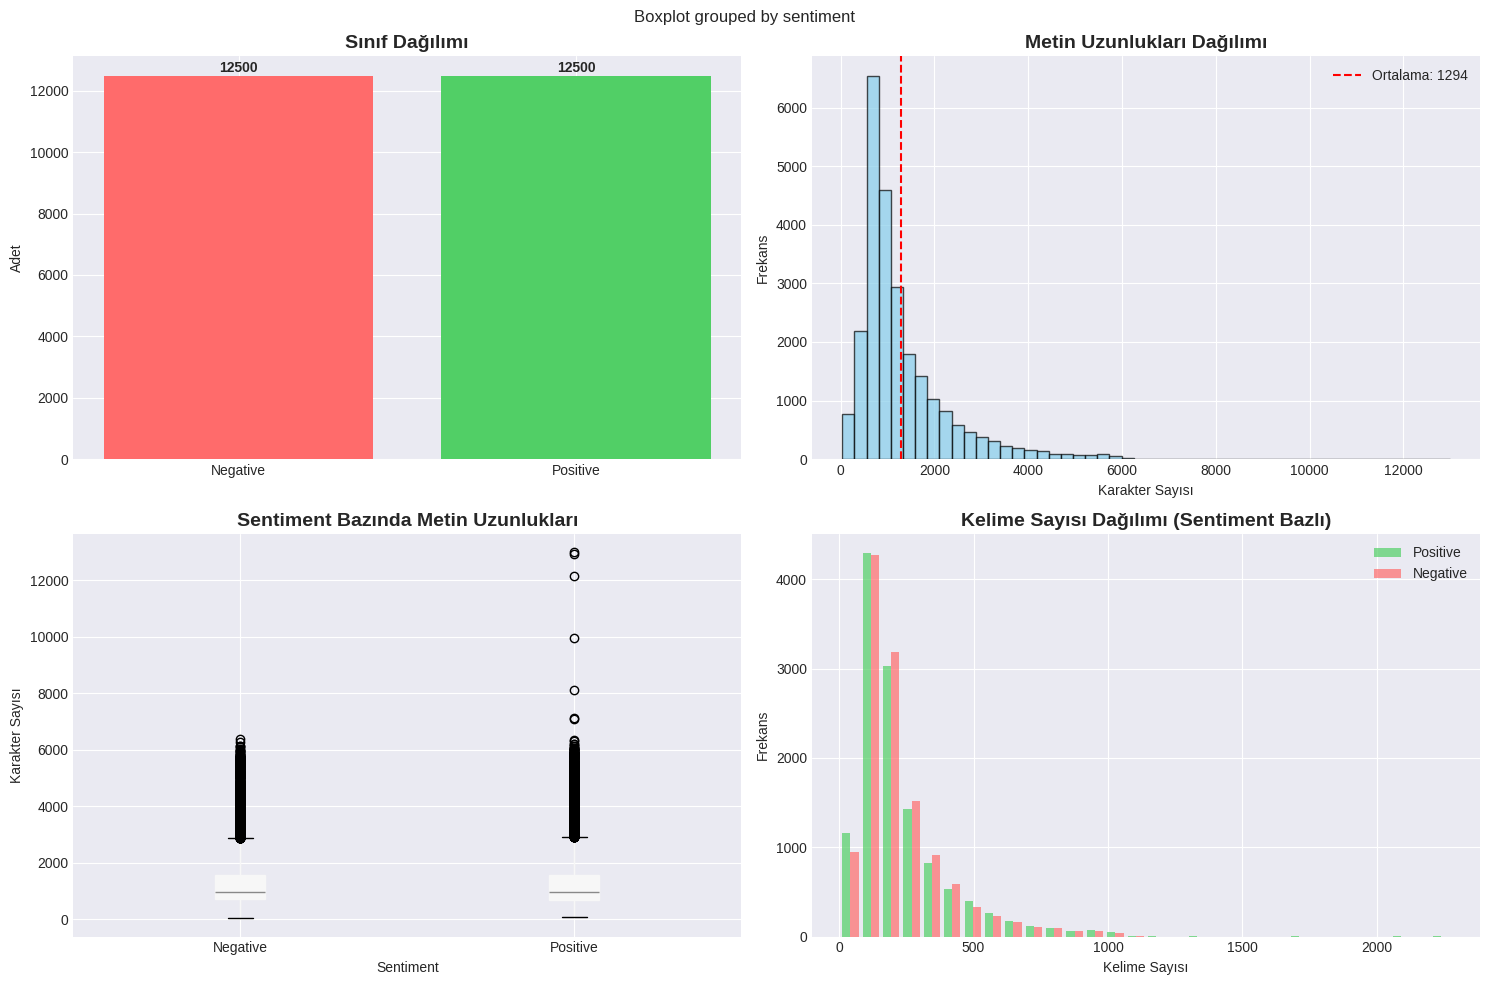

✅ Veri seti analizi tamamlandı!


In [38]:
# Veri setini görselleştirelim
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Grafik 1: Sınıf Dağılımı
sentiment_counts = df['sentiment'].value_counts()
axes[0, 0].bar(sentiment_counts.index, sentiment_counts.values, color=['#ff6b6b', '#51cf66'])
axes[0, 0].set_title('Sınıf Dağılımı', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Adet')
for i, v in enumerate(sentiment_counts.values):
    axes[0, 0].text(i, v + 100, str(v), ha='center', fontweight='bold')

# Grafik 2: Metin Uzunlukları Dağılımı
axes[0, 1].hist(df['text_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Metin Uzunlukları Dağılımı', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Karakter Sayısı')
axes[0, 1].set_ylabel('Frekans')
axes[0, 1].axvline(df['text_length'].mean(), color='red', linestyle='--',
                    label=f'Ortalama: {df["text_length"].mean():.0f}')
axes[0, 1].legend()

# Grafik 3: Sentiment'a Göre Metin Uzunlukları
df.boxplot(column='text_length', by='sentiment', ax=axes[1, 0], patch_artist=True)
axes[1, 0].set_title('Sentiment Bazında Metin Uzunlukları', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Karakter Sayısı')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Negative', 'Positive'])

# Grafik 4: Kelime Sayısı Dağılımı
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
axes[1, 1].hist([df[df['sentiment']=='Positive']['word_count'],
                  df[df['sentiment']=='Negative']['word_count']],
                bins=30, label=['Positive', 'Negative'],
                color=['#51cf66', '#ff6b6b'], alpha=0.7)
axes[1, 1].set_title('Kelime Sayısı Dağılımı (Sentiment Bazlı)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Kelime Sayısı')
axes[1, 1].set_ylabel('Frekans')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("✅ Veri seti analizi tamamlandı!")

## 🤖 Model Uygulama: Duygu Analizi

Şimdi veri setinin bir alt kümesi üzerinde duygu analizi modelimizi çalıştıralım.

In [39]:
# Performans nedeniyle ilk 100 örnek üzerinde çalışalım
# Gerçek uygulamalarda tüm veri seti kullanılabilir
sample_size = 100
df_sample = df.sample(n=sample_size, random_state=42).reset_index(drop=True)

print(f"🎯 Örnek veri seti hazırlandı: {len(df_sample)} örnek")
print(f"📊 Sınıf dağılımı:")
print(df_sample['sentiment'].value_counts())

🎯 Örnek veri seti hazırlandı: 100 örnek
📊 Sınıf dağılımı:
sentiment
Positive    53
Negative    47
Name: count, dtype: int64


In [40]:
# Sentiment Analysis modelini hazırlayalım
from transformers import pipeline

# Daha güçlü bir model kullanalım: DistilBERT
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

print("✅ Sentiment analiz modeli hazır!")
print(f"📊 Model: {sentiment_analyzer.model.name_or_path}")
print("\n🔄 Model tahminleri yapılıyor...")

# Tahminleri yap (batch processing ile daha hızlı)
# truncation=True: Uzun metinleri kes
predictions = []

# Batch işleme için metinleri gruplara ayır
batch_size = 16
for i in range(0, len(df_sample), batch_size):
    batch = df_sample['text'][i:i+batch_size].tolist()

    # Metinleri ilk 512 karakterle sınırla (BERT limiti)
    batch_truncated = [text[:512] for text in batch]

    # Tahmin yap
    batch_predictions = sentiment_analyzer(batch_truncated)
    predictions.extend(batch_predictions)

    # İlerleme göster
    progress = min(i + batch_size, len(df_sample))
    print(f"   İşlenen: {progress}/{len(df_sample)}", end='\r')

print(f"\n✅ Tahminler tamamlandı!")

# Sonuçları DataFrame'e ekle
df_sample['predicted_label'] = [p['label'] for p in predictions]
df_sample['predicted_score'] = [p['score'] for p in predictions]

# Label'ları standartlaştır (POSITIVE/NEGATIVE → Positive/Negative)
df_sample['predicted_sentiment'] = df_sample['predicted_label'].map({
    'POSITIVE': 'Positive',
    'NEGATIVE': 'Negative'
})

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


✅ Sentiment analiz modeli hazır!
📊 Model: distilbert-base-uncased-finetuned-sst-2-english

🔄 Model tahminleri yapılıyor...
   İşlenen: 100/100
✅ Tahminler tamamlandı!


## 📊 Model Değerlendirme

Şimdi modelimizin performansını değerlendirelim.

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Gerçek ve tahmin edilen etiketler
y_true = df_sample['sentiment']
y_pred = df_sample['predicted_sentiment']

# Metrikler
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='Positive')
recall = recall_score(y_true, y_pred, pos_label='Positive')
f1 = f1_score(y_true, y_pred, pos_label='Positive')

print("🎯 MODEL PERFORMANS METRİKLERİ\n" + "="*80)
print(f"\n✅ Accuracy (Doğruluk):   {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"✅ Precision (Kesinlik):  {precision:.4f} ({precision*100:.2f}%)")
print(f"✅ Recall (Duyarlılık):   {recall:.4f} ({recall*100:.2f}%)")
print(f"✅ F1-Score:              {f1:.4f}")

print(f"\n{'='*80}")
print("📋 DETAYLI SINIFLANDIRMA RAPORU:\n")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=['Negative', 'Positive'])
print(f"{'='*80}")
print("🔢 CONFUSION MATRIX:\n")
print(f"                Predicted")
print(f"                Negative  Positive")
print(f"Actual Negative    {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"       Positive    {cm[1,0]:4d}      {cm[1,1]:4d}")

🎯 MODEL PERFORMANS METRİKLERİ

✅ Accuracy (Doğruluk):   0.8000 (80.00%)
✅ Precision (Kesinlik):  0.8511 (85.11%)
✅ Recall (Duyarlılık):   0.7547 (75.47%)
✅ F1-Score:              0.8000

📋 DETAYLI SINIFLANDIRMA RAPORU:

              precision    recall  f1-score   support

    Negative       0.75      0.85      0.80        47
    Positive       0.85      0.75      0.80        53

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100

🔢 CONFUSION MATRIX:

                Predicted
                Negative  Positive
Actual Negative      40         7
       Positive      13        40


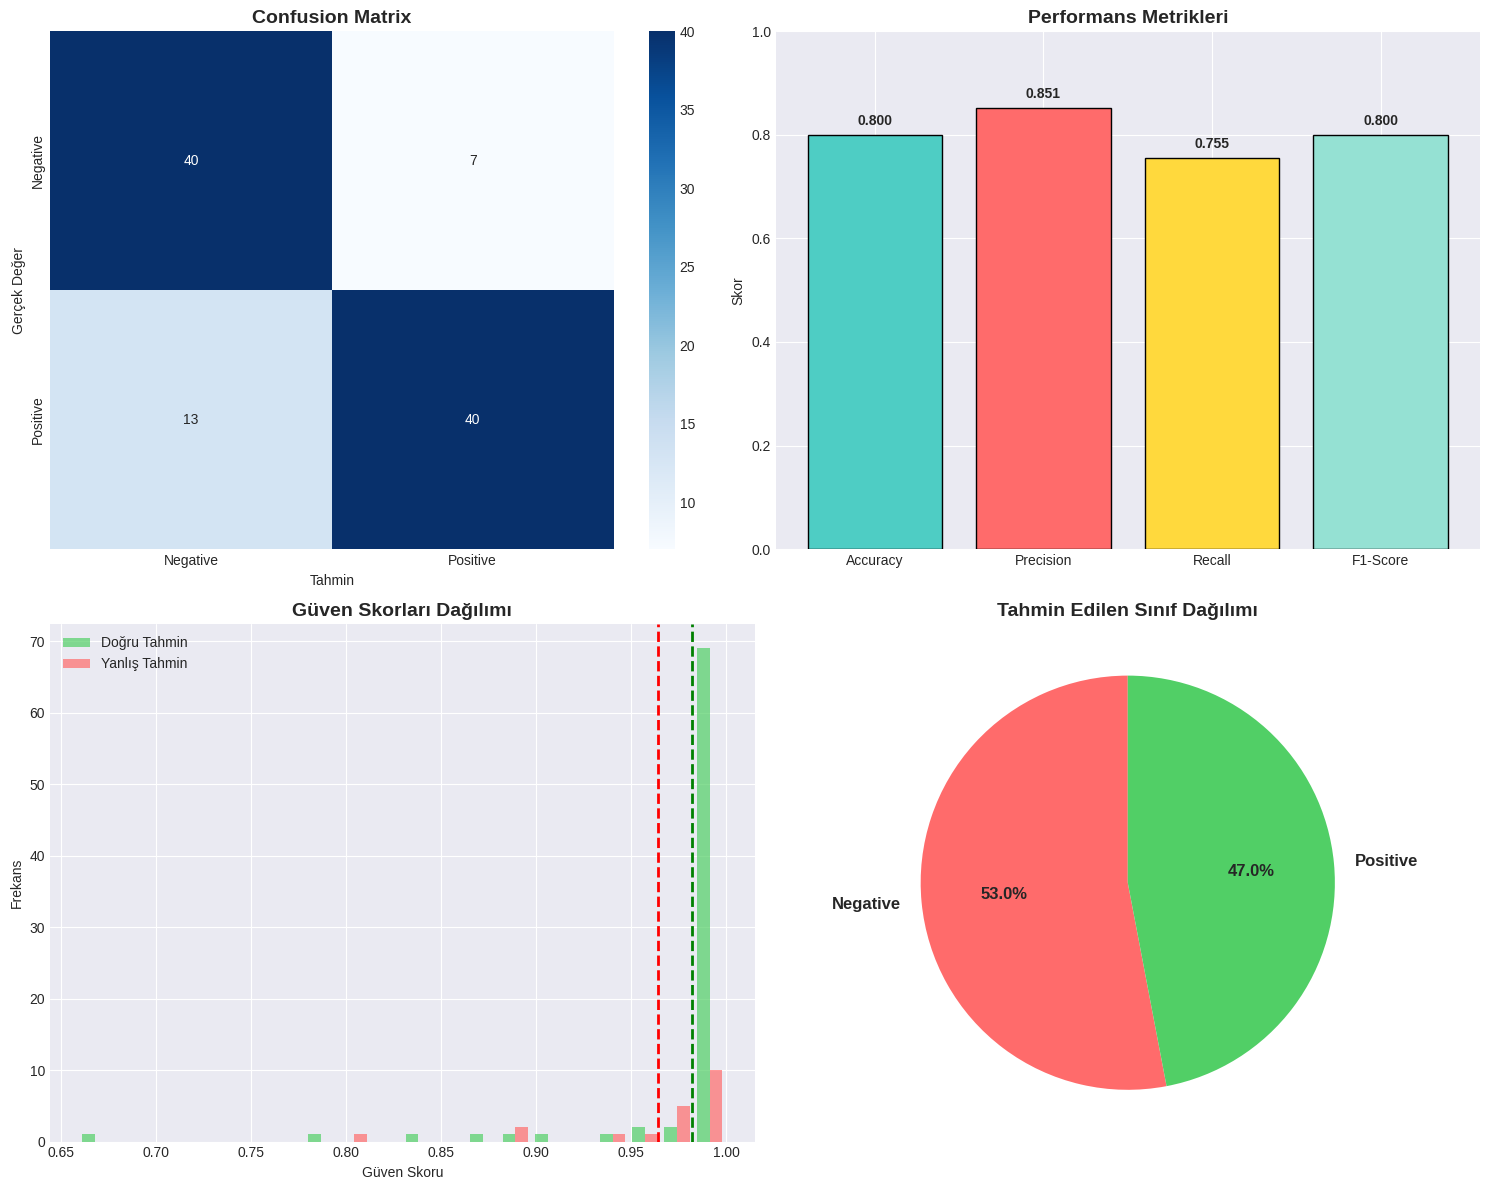


📊 Özet:
   • Toplam örnek: 100
   • Doğru tahmin: 80 (%80.0)
   • Yanlış tahmin: 20 (%20.0)
   • Ortalama güven skoru (doğru): 0.9820
   • Ortalama güven skoru (yanlış): 0.9644


In [42]:
# Sonuçları görselleştirelim
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Grafik 1: Confusion Matrix (Heatmap)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
axes[0, 0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Gerçek Değer')
axes[0, 0].set_xlabel('Tahmin')

# Grafik 2: Metrik Karşılaştırması
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['#4ecdc4', '#ff6b6b', '#ffd93d', '#95e1d3']
bars = axes[0, 1].bar(metrics, values, color=colors, edgecolor='black')
axes[0, 1].set_title('Performans Metrikleri', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Skor')
axes[0, 1].set_ylim([0, 1])
for bar, val in zip(bars, values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f'{val:.3f}', ha='center', fontweight='bold')

# Grafik 3: Güven Skorlarının Dağılımı
correct = df_sample[df_sample['sentiment'] == df_sample['predicted_sentiment']]
incorrect = df_sample[df_sample['sentiment'] != df_sample['predicted_sentiment']]

axes[1, 0].hist([correct['predicted_score'], incorrect['predicted_score']],
                bins=20, label=['Doğru Tahmin', 'Yanlış Tahmin'],
                color=['#51cf66', '#ff6b6b'], alpha=0.7)
axes[1, 0].set_title('Güven Skorları Dağılımı', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Güven Skoru')
axes[1, 0].set_ylabel('Frekans')
axes[1, 0].legend()
axes[1, 0].axvline(correct['predicted_score'].mean(), color='green',
                    linestyle='--', linewidth=2, label='Doğru Ort.')
axes[1, 0].axvline(incorrect['predicted_score'].mean(), color='red',
                    linestyle='--', linewidth=2, label='Yanlış Ort.')

# Grafik 4: Tahmin Dağılımı
prediction_dist = df_sample['predicted_sentiment'].value_counts()
axes[1, 1].pie(prediction_dist.values, labels=prediction_dist.index,
               autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'],
               startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1, 1].set_title('Tahmin Edilen Sınıf Dağılımı', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Özet:")
print(f"   • Toplam örnek: {len(df_sample)}")
print(f"   • Doğru tahmin: {len(correct)} (%{len(correct)/len(df_sample)*100:.1f})")
print(f"   • Yanlış tahmin: {len(incorrect)} (%{len(incorrect)/len(df_sample)*100:.1f})")
print(f"   • Ortalama güven skoru (doğru): {correct['predicted_score'].mean():.4f}")
print(f"   • Ortalama güven skoru (yanlış): {incorrect['predicted_score'].mean():.4f}")

## 🔍 Hata Analizi

En yanlış sınıflandırılan örnekleri inceleyelim.

In [43]:
# Yanlış tahminleri analiz edelim
print("❌ YANLIŞ TAHMİNLER ANALİZİ\n" + "="*80)

if len(incorrect) > 0:
    # En yüksek güven skoruna sahip yanlış tahminler
    top_errors = incorrect.nlargest(5, 'predicted_score')

    print(f"\n🔴 En Yüksek Güvenle Yapılan YANLIŞ Tahminler:\n")

    for idx, row in top_errors.iterrows():
        print(f"{'='*80}")
        print(f"📝 Metin: {row['text'][:300]}...")
        print(f"\n   Gerçek:  {row['sentiment']}")
        print(f"   Tahmin:  {row['predicted_sentiment']}")
        print(f"   Güven:   {row['predicted_score']:.4f}")
        print()

    # False Positives ve False Negatives
    false_positives = incorrect[incorrect['predicted_sentiment'] == 'Positive']
    false_negatives = incorrect[incorrect['predicted_sentiment'] == 'Negative']

    print(f"{'='*80}")
    print(f"\n📊 Hata Türleri:")
    print(f"   • False Positives (Negatif → Pozitif tahmin): {len(false_positives)}")
    print(f"   • False Negatives (Pozitif → Negatif tahmin): {len(false_negatives)}")

else:
    print("🎉 Tebrikler! Hiç yanlış tahmin yok!")

❌ YANLIŞ TAHMİNLER ANALİZİ

🔴 En Yüksek Güvenle Yapılan YANLIŞ Tahminler:

📝 Metin: The first Disney animated film without the strong involvement of Disney himself, this film suffers from the fact that the story is not particularly original or interesting (this is, I believe, the only animated Disney film since the 1940's which is NOT based on an earlier book or other work, but is ...

   Gerçek:  Positive
   Tahmin:  Negative
   Güven:   0.9993

📝 Metin: I just watched it for the second time today and I must say with all my heart it is about damn time they made a movie about us as people not as spiritual beings. Such a waste of human life as this story was maybe some good will come out of it. And Eric is hotter than ever. To often in the movies Firs...

   Gerçek:  Positive
   Tahmin:  Negative
   Güven:   0.9984

📝 Metin: I rented Boogie Nights last week and I could tell you, when I watched the film I had a blast. If you think that when you watch the film you will get sicked by the p

## 🎓 Sonuç ve Öğrendiklerimiz

### ✅ Bu Notebook'ta Öğrendiklerimiz:

1. **Pipeline API Kullanımı:** Hugging Face'in güçlü pipeline API'si ile farklı NLP görevlerini kolayca gerçekleştirdik

2. **Çok Görevli Model Kullanımı:**
   - Duygu Analizi (Sentiment Analysis)
   - Sıfır-Atış Sınıflandırma (Zero-Shot Classification)
   - Metin Üretimi (Text Generation)
   - Maskeli Kelime Tahmini (Fill-Mask)
   - Adlandırılmış Varlık Tanıma (NER)
   - Soru-Cevap (Question Answering)
   - Metin Özetleme (Summarization)
   - Makine Çevirisi (Translation)

3. **Gerçek Veri Seti Uygulaması:**
   - IMDb film yorumları üzerinde pratik çalışma
   - Veri keşfi ve görselleştirme
   - Model değerlendirme ve metrikler
   - Hata analizi

4. **Best Practices:**
   - Batch processing ile performans optimizasyonu
   - Model seçimi stratejileri
   - Görselleştirme teknikleri
   - Sonuçların yorumlanması

### 🚀 Bir Sonraki Adımlar:

- 🔧 Fine-tuning: Kendi veri setiniz üzerinde modelleri eğitin
- 📊 Daha büyük veri setleri: Tüm IMDb veri seti ile çalışın
- 🌐 Çok dilli modeller: Türkçe ve diğer diller için modeller deneyin
- 🎯 Production: Modelleri gerçek uygulamalara entegre edin

### 📚 Kaynaklar:

- 🌐 [Hugging Face Documentation](https://huggingface.co/docs)
- 📖 [Transformers Library](https://github.com/huggingface/transformers)
- 🎓 [NLP Course](https://huggingface.co/course)
- 💻 [Model Hub](https://huggingface.co/models)

In [44]:
# Son olarak, tüm öğrendiklerimizi özetleyen bir özet rapor oluşturalım
print("="*80)
print(" " * 20 + "🎓 TRANSFORMERS EĞİTİMİ - ÖZET RAPOR")
print("="*80)

print("\n📚 Kullanılan Teknolojiler:")
print("   ✓ Hugging Face Transformers")
print("   ✓ PyTorch Backend")
print("   ✓ Datasets Library")
print("   ✓ Pandas & NumPy")
print("   ✓ Matplotlib & Seaborn")

print("\n🎯 Tamamlanan Görevler:")
gorevler = [
    "Sentiment Analysis (Duygu Analizi)",
    "Zero-Shot Classification (Sıfır-Atış Sınıflandırma)",
    "Text Generation (Metin Üretimi)",
    "Fill-Mask (Maskeli Kelime Tahmini)",
    "Named Entity Recognition (NER)",
    "Question Answering (Soru-Cevap)",
    "Summarization (Metin Özetleme)",
    "Translation (Makine Çevirisi)",
    "IMDb Dataset Analysis (Gerçek Veri Seti Analizi)"
]

for i, gorev in enumerate(gorevler, 1):
    print(f"   {i}. ✅ {gorev}")

print("\n📊 Performans Sonuçları (IMDb Dataset):")
print(f"   • Veri Seti Boyutu: {len(df_sample)} örnek")
print(f"   • Model Accuracy: {accuracy*100:.2f}%")
print(f"   • F1-Score: {f1:.4f}")
print(f"   • Doğru Tahmin: {len(correct)}/{len(df_sample)}")

print("\n💡 Önemli Öğrenmeler:")
print("   1. Pipeline API, NLP görevlerini basitleştirir")
print("   2. Pre-trained modeller, sıfırdan başlamak yerine transfer learning sağlar")
print("   3. Batch processing, büyük veri setlerinde performansı artırır")
print("   4. Model seçimi, görev ve kaynaklara göre yapılmalıdır")
print("   5. Evaluation metrikleri, model performansını anlamak için kritiktir")

print("\n" + "="*80)
print(" " * 25 + "🎉 EĞİTİM TAMAMLANDI! 🎉")
print("="*80)

print("\n📝 Hazırlayan: Cemal YÜKSEL")
print("📅 Tarih: 2025")
print("⭐ From Zero to Hero - Transformers with Hugging Face")
print("\n" + "="*80)

                    🎓 TRANSFORMERS EĞİTİMİ - ÖZET RAPOR

📚 Kullanılan Teknolojiler:
   ✓ Hugging Face Transformers
   ✓ PyTorch Backend
   ✓ Datasets Library
   ✓ Pandas & NumPy
   ✓ Matplotlib & Seaborn

🎯 Tamamlanan Görevler:
   1. ✅ Sentiment Analysis (Duygu Analizi)
   2. ✅ Zero-Shot Classification (Sıfır-Atış Sınıflandırma)
   3. ✅ Text Generation (Metin Üretimi)
   4. ✅ Fill-Mask (Maskeli Kelime Tahmini)
   5. ✅ Named Entity Recognition (NER)
   6. ✅ Question Answering (Soru-Cevap)
   7. ✅ Summarization (Metin Özetleme)
   8. ✅ Translation (Makine Çevirisi)
   9. ✅ IMDb Dataset Analysis (Gerçek Veri Seti Analizi)

📊 Performans Sonuçları (IMDb Dataset):
   • Veri Seti Boyutu: 100 örnek
   • Model Accuracy: 80.00%
   • F1-Score: 0.8000
   • Doğru Tahmin: 80/100

💡 Önemli Öğrenmeler:
   1. Pipeline API, NLP görevlerini basitleştirir
   2. Pre-trained modeller, sıfırdan başlamak yerine transfer learning sağlar
   3. Batch processing, büyük veri setlerinde performansı artırır
   4. Mo